Importing Modules 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import joblib


Generating Data 

In [17]:
np.random.seed(42)
n_samples = 500
X1 = np.random.uniform(1,10,n_samples)
noise = np.random.normal(1,5,n_samples)
y = 10 * X1 + noise

Creating DataFrame

In [18]:
df = pd.DataFrame({"Hours_Studied":X1, "Test_score":y})
df.head()

,Hours_Studied,Test_score
0,4.370861,46.417391
1,9.556429,105.945142
2,7.587945,81.631574
3,6.387926,61.994745
4,2.404168,20.549604


Visualizing


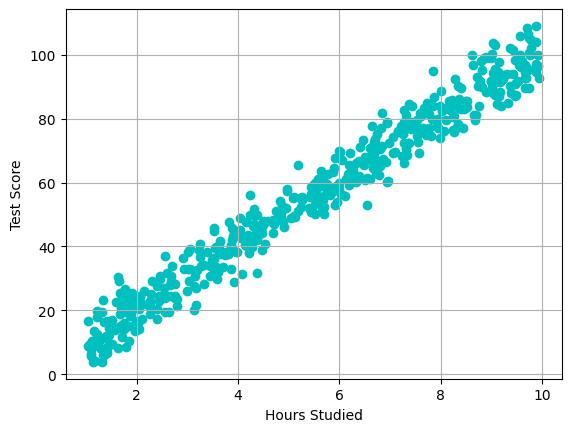

In [19]:
plt.scatter(df['Hours_Studied'],df['Test_score'],color='c')
plt.grid(True)
plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.show()

In [20]:
print(df.corr())

               Hours_Studied  Test_score
Hours_Studied       1.000000    0.983399
Test_score          0.983399    1.000000


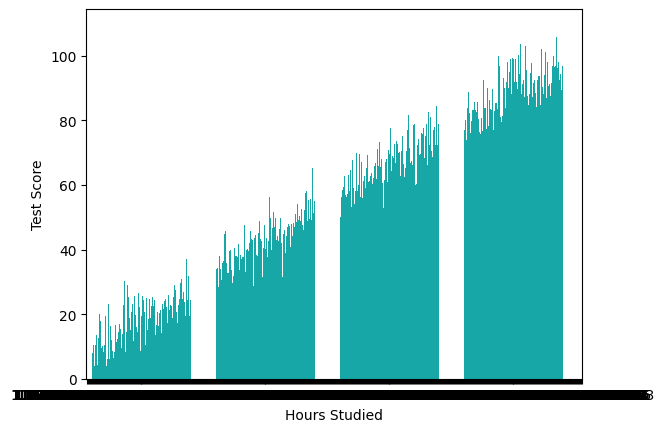

In [21]:
sns.barplot(x='Hours_Studied',y='Test_score',data=df,color='c')
plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.show()

Scaling DataFrame

In [22]:
X = df[['Hours_Studied']]
y = df['Test_score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


Training ML Model

In [24]:
model = LinearRegression()
model.fit(scaled_X_train,y_train)


LinearRegression()

In [25]:
print(f"Coefficient :",model.coef_)
print(f"Intercept :",model.intercept_)

Coefficient : [27.36366881]
Intercept : 56.653165844317265


In [26]:
y_pred = model.predict(scaled_X_test)
print(f"R2 Score : {r2_score(y_test,y_pred)*100}")

R2 Score : 96.33706213866652


Prediction

In [27]:
new_data = np.array([[6]])
new_data_df = pd.DataFrame(new_data,columns=['Hours_Studied'])
new_data_df_scaled = scaler.transform(new_data_df)
single_prediction = model.predict(new_data_df_scaled)
print(f"Predicted Test Score for 6 hours : {single_prediction[0]}")

Predicted Test Score for 6 hours : 61.115177660507925


In [28]:
new_data = np.array([[5]])
new_data_df = pd.DataFrame(new_data,columns=['Hours_Studied'])
new_data_df_scaled = scaler.transform(new_data_df)
single_prediction = model.predict(new_data_df_scaled)
print(f"Predicted Test Score for 5 hours : {single_prediction[0]}")

Predicted Test Score for 5 hours : 50.945536686412


In [29]:
joblib.dump(model,"LinearRegression_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [30]:
loaded_model = joblib.load('LinearRegression_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')
new_data = np.array([[6]])
new_data_df = pd.DataFrame(new_data,columns=['Hours_Studied'])
new_data_scaled = loaded_scaler.transform(new_data_df)
single_prediction = loaded_model.predict(new_data_scaled)
print(single_prediction)

[61.11517766]
